# Part 1. EDA and Data Cleaning

## Importing libraries and setting global variables

In [1]:
# Import usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Missing values visualization
import missingno as msno

## Importing datasets

In [2]:
def read_train_test(status='train'):
    # Function to select dataset to read
    if status == 'train':
        df = pd.read_csv('../datasets/train.csv')
    elif status == 'test':
        df = pd.read_csv('../datasets/test.csv')
    else:
        print(f"Select the correct dataset")
    return df

In [3]:
# Select 'train' to read train.csv
# Select 'test' to read test.csv
status = 'train'
df = read_train_test(status)

In [4]:
len(df.select_dtypes(exclude=object).columns)

39

In [5]:
len(df.select_dtypes(include=object).columns)

43

In [6]:
# View head
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [7]:
# Create a dictionary to rename columns
col_name_dict = {'Order':'Order', 'PID':'pid', 'MS SubClass':'ms_subclass', 'MS Zoning':'ms_zoning',
                 'Lot Frontage':'lot_frontage', 'Lot Area':'lot_area','Street':'street','Alley':'alley',
                 'Lot Shape':'lot_shape', 'Land Contour':'lot_contour', 'Utilities':'utilities',
                 'Lot Config':'lot_config', 'Land Slope':'lot_slope', 'Neighborhood':'neighborhood',
                 'Condition 1':'condition_1','Condition 2':'condition_2', 'Bldg Type':'building_type',
                 'House Style':'house_style', 'Overall Qual':'overall_quality','Overall Cond':'overall_condition',
                 'Year Built':'year_built', 'Year Remod/Add':'year_remodel', 'Roof Style':'roof_style',
                 'Roof Matl':'roof_material', 'Exterior 1st':'exterior_1', 'Exterior 2nd':'exterior_2',
                 'Mas Vnr Type':'masonry_type','Mas Vnr Area':'masonry_area', 'Exter Qual':'external_quality',
                 'Exter Cond':'external_condition', 'Foundation':'foundation', 'Bsmt Qual':'basement_quality',
                 'Bsmt Cond':'basement_condition', 'Bsmt Exposure':'basement_exposure',
                 'BsmtFin Type 1':'basement_fin_type_1', 'BsmtFin SF 1':'basement_fin_sf_1',
                 'BsmtFin Type 2':'basement_fin_type_2', 'BsmtFin SF 2':'basement_fin_sf_2',
                 'Bsmt Unf SF':'basement_unf_sf', 'Total Bsmt SF':'total_basement_sf','Heating':'heating',
                 'Heating QC':'heating_quality', 'Central Air':'central_air', 'Electrical':'electrical',
                 '1st Flr SF':'1st_floor_sf','2nd Flr SF':'2nd_floor_sf', 'Low Qual Fin SF':'low_quality_fin_sf',
                 'Gr Liv Area':'ground_living_sf', 'Bsmt Full Bath':'basement_full_bath',
                 'Bsmt Half Bath':'basement_half_bath', 'Full Bath':'full_bath', 'Half Bath':'half_bath',
                 'Bedroom AbvGr':'bedroom_above_ground','Kitchen AbvGr':'kitchen_above_ground',
                 'Kitchen Qual':'kitchen_quality', 'TotRms AbvGrd':'total_rooms_above_ground', 
                 'Functional':'functional','Fireplaces':'fireplace', 'Fireplace Qu':'fireplace_quality',
                 'Garage Type':'garage_type', 'Garage Yr Blt':'garage_year_built','Garage Finish':'garage_fin',
                 'Garage Cars':'garage_cars', 'Garage Area':'garage_area', 'Garage Qual':'garage_quality',
                 'Garage Cond':'garage_condition', 'Paved Drive':'paved_drive', 'Wood Deck SF':'wood_deck_sf',
                 'Open Porch SF':'open_porch_sf','Enclosed Porch':'enclosed_porch', '3Ssn Porch':'3ssn_porch',
                 'Screen Porch':'screen_porch', 'Pool Area':'pool_area', 'Pool QC':'pool_quality','Fence':'fence',
                 'Misc Feature':'misc_feature', 'Misc Val':'misc_value', 'Mo Sold':'month_sold',
                 'Yr Sold':'year_sold', 'Sale Type':'sale_type','Sale Condition':'sale_condition',
                 'SalePrice':'sale_price'}

In [8]:
# Rename columns
df = df.rename(columns=col_name_dict)

In [9]:
# Verify shape of df
df.shape

(2197, 82)

## Dealing with null values

#### Grouping of actionable columns

In [10]:
# Creating sets of actionable columns
fill_by_drop = []
fill_by_impute_0 = []
fill_by_impute_none = []
fill_by_impute_stats = []

In [11]:
# Check shape
df.shape

(2197, 82)

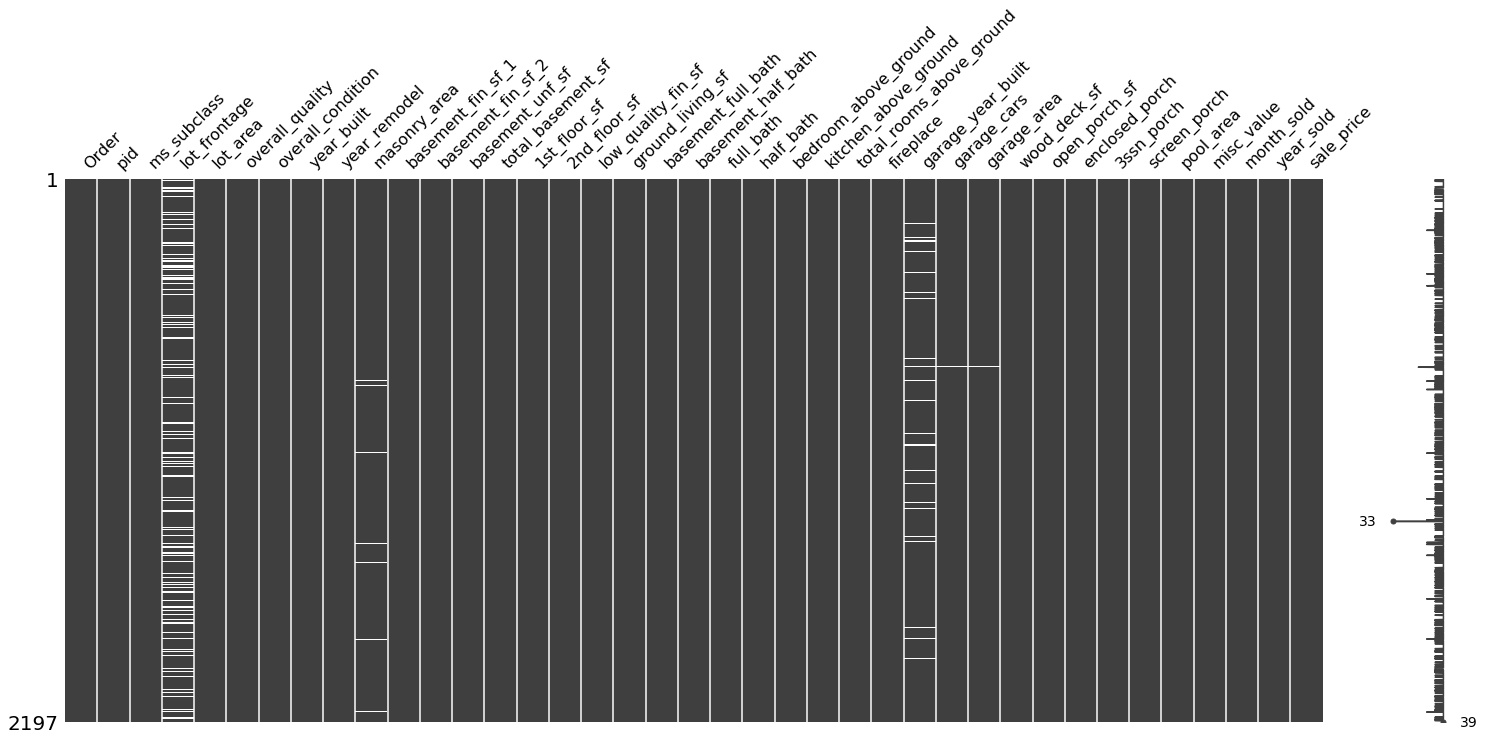

In [12]:
# Check for missing values for numerical
msno.matrix(df.select_dtypes(exclude=object));

In [13]:
# Check nulls values for numerical columns
df.select_dtypes(exclude=object).isnull().mean()\
[df.select_dtypes(exclude=object).isnull().sum() > 0].sort_values(ascending=False)

lot_frontage          0.164770
garage_year_built     0.055530
masonry_area          0.010014
basement_fin_sf_1     0.000455
basement_fin_sf_2     0.000455
basement_unf_sf       0.000455
total_basement_sf     0.000455
basement_full_bath    0.000455
basement_half_bath    0.000455
garage_cars           0.000455
garage_area           0.000455
dtype: float64

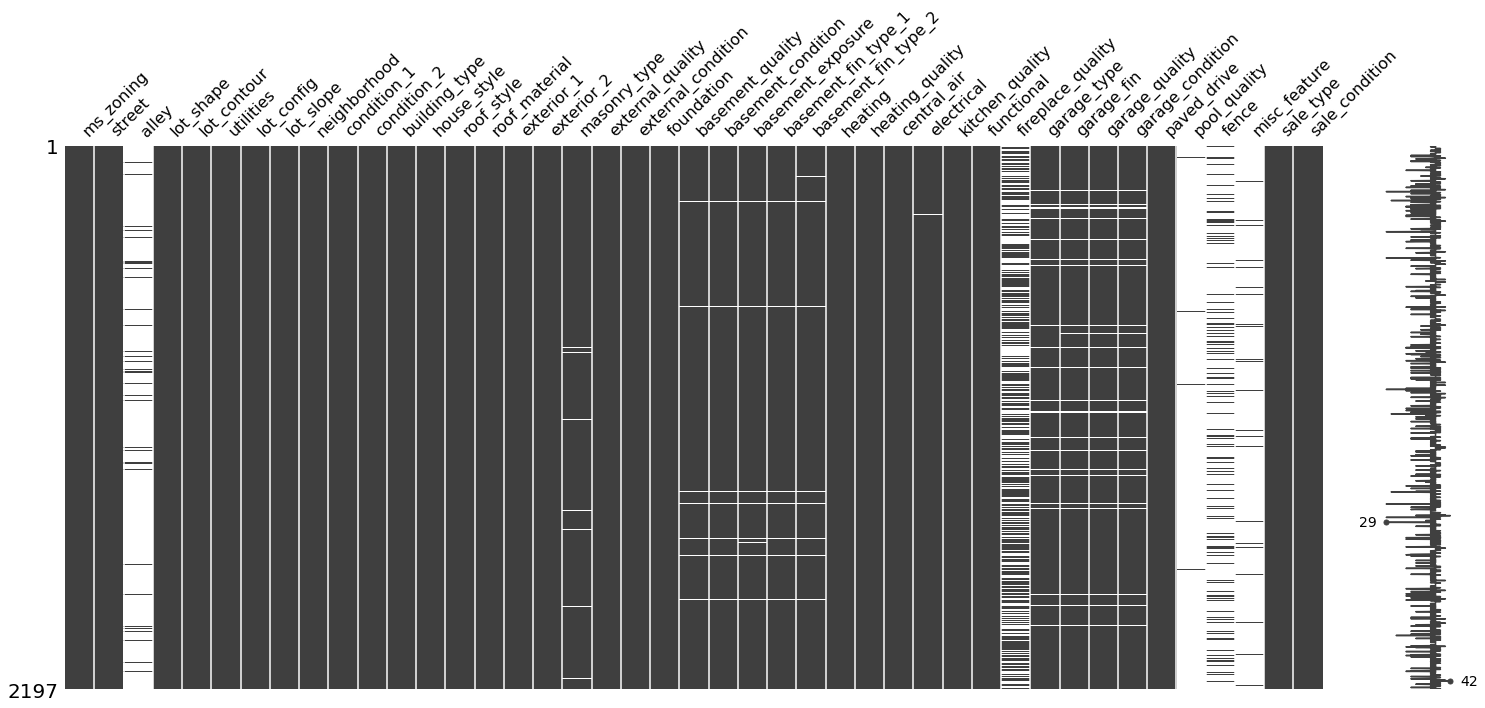

In [14]:
# Check for missing values for categorical column
msno.matrix(df.select_dtypes(include=object));

In [15]:
# Check nulls values for numerical columns
df.select_dtypes(include=object).isnull().mean()\
[df.select_dtypes(include=object).isnull().sum() > 0].sort_values(ascending=False)

pool_quality           0.994538
misc_feature           0.963587
alley                  0.934911
fence                  0.809285
fireplace_quality      0.485207
garage_fin             0.055530
garage_quality         0.055530
garage_condition       0.055530
garage_type            0.054620
basement_exposure      0.031406
basement_fin_type_2    0.030951
basement_quality       0.030496
basement_condition     0.030496
basement_fin_type_1    0.030496
masonry_type           0.010014
electrical             0.000455
dtype: float64

#### Columns with over 80% missing values

In [16]:
# 4 columns has over 80% of missing values (we can drop these)
# moving these columns to fill_by_drop list
fill_by_drop.extend(['pool_quality','misc_feature','alley','fence'])

#### Fireplace Quality

In [17]:
# Missing fireplace_quality means no fireplace at all - impute with 'None'
df.groupby(['fireplace_quality'],dropna=False)[['fireplace']].agg([pd.Series.mode,'count'])

fireplace      
                       mode count
fireplace_quality                
Ex                        1    30
Fa                        1    50
Gd                        1   564
Po                        1    33
TA                        1   454
NaN                       0  1066

In [18]:
# Action allocation - Move fireplace_quality to columns to impute with 'None'
fill_by_impute_none.append('fireplace_quality')

#### Masonry Type and Area

In [19]:
# missing masonry area means no masonry - we can set to the mode 
# masonry_type impute None
# masonry_area impute 0
df.groupby(['masonry_type'],dropna=False)[['masonry_area']].agg([pd.Series.mode,'count'])

masonry_area      
                     mode count
masonry_type                   
BrkCmn              161.0    19
BrkFace             120.0   658
CBlock              198.0     1
None                  0.0  1307
Stone               186.0   190
NaN                    []     0

In [20]:
# action allocation - moving masonry type to impute with none
fill_by_impute_none.append('masonry_type')
# action allocation - moving masonry area to impute with 0
fill_by_impute_0.append('masonry_area')

#### Lot Frontage

Mode lot area for missing lot frontage: 7500
Mode lot area for missing lot frontage: IR1
Mode lot frontage for 7500,IR1 : nan


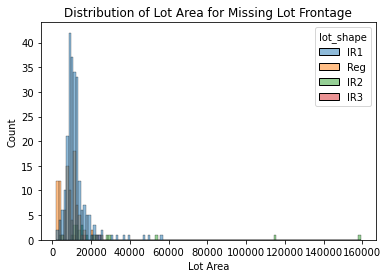

In [21]:
# Majority of missing values seems to be
# lot_shape = IR1
# lot_area = 7,500

print(f"Mode lot area for missing lot frontage: {df[df['lot_frontage'].isnull()]['lot_area'].mode()[0]}")
print(f"Mode lot area for missing lot frontage: {df[df['lot_frontage'].isnull()]['lot_shape'].mode()[0]}")

print(f"Mode lot frontage for 7500,IR1 : {df[(df['lot_area'] == 7500) & (df['lot_shape']=='IR1')]['lot_frontage'].mean()}")

fig, ax = plt.subplots(figsize=(6,4))

plt.title('Distribution of Lot Area for Missing Lot Frontage')
plt.xlabel('Lot Area')

sns.histplot(x='lot_area',data=df[df['lot_frontage'].isnull()], hue='lot_shape');

In [22]:
# computing for the description of lot_area and lot_shape of those similar to missing values of lot_frontage
df[(df['lot_area'] > 7000) & (df['lot_area'] < 8000) & (df['lot_shape'] == 'IR1')][['lot_frontage']].describe()

,lot_frontage
count,41.000000
mean,63.926829
std,17.154286
min,28.000000
25%,54.000000
50%,64.000000
75%,74.000000
max,110.000000


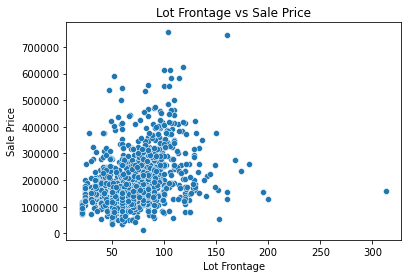

In [23]:
plt.title('Lot Frontage vs Sale Price')
plt.xlabel('Lot Frontage')
plt.ylabel('Sale Price')

sns.scatterplot(x='lot_frontage',y='sale_price', data=df);
# Since there seem to be outliers in the lot frontage we will impute with the median
# Median and mean is very close in this case so both should work well - (impute with 60)

In [24]:
# moving to impute with stats
fill_by_impute_stats.append('lot_frontage')

In [25]:
# everything is missing for the case of garage group - meaning no garage at all
df[df['garage_condition'].isnull()][['garage_type', 'garage_year_built', 'garage_fin', 'garage_cars',
       'garage_area', 'garage_quality', 'garage_condition']]

,garage_type,garage_year_built,garage_fin,garage_cars,garage_area,garage_quality,garage_condition
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
43,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
61,NaN,NaN,NaN,0.0,0.0,NaN,NaN
63,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2121,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2144,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2153,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2175,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [26]:
# Check how many houses garage was built on the same year as house
pd.Series(df['garage_year_built']==df['year_built']).mean().round(4)*100

# About 76% of ames's houses has garage built on the same year

76.6

In [27]:
# move garage columns to impute with na
fill_by_impute_none.extend(['garage_type','garage_fin','garage_quality','garage_condition'])

# move garage year built to fill with stats
fill_by_impute_stats.extend(['garage_year_built'])
# move garage columns to impute with 0
fill_by_impute_0.extend(['garage_cars','garage_area'])

In [28]:
# check basement group 
# everything is missing for the case of basement group - meaning no basement at all
df[df['basement_exposure'].isnull()][['basement_quality', 'basement_condition', 'basement_exposure',
       'basement_fin_type_1', 'basement_fin_sf_1', 'basement_fin_type_2',
       'basement_fin_sf_2', 'basement_unf_sf', 'total_basement_sf',
       'basement_full_bath', 'basement_half_bath']]

,basement_quality,basement_condition,basement_exposure,basement_fin_type_1,basement_fin_sf_1,basement_fin_type_2,basement_fin_sf_2,basement_unf_sf,total_basement_sf,basement_full_bath,basement_half_bath
99,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
141,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
162,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
165,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
168,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2024,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2043,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2059,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [29]:
# move these columns to impute with na
fill_by_impute_none.extend(['basement_quality','basement_condition','basement_exposure','basement_fin_type_1',
                         'basement_fin_type_2'])

# move these columns to impute with 0
fill_by_impute_0.extend(['basement_fin_sf_1','basement_fin_sf_2','basement_unf_sf','basement_full_bath',
                         'basement_half_bath','total_basement_sf'])

In [30]:
df[df['electrical'].isnull()]['utilities']

280    AllPub
Name: utilities, dtype: object

In [31]:
# Utilities that is 'AllPub' can be impute with the mode of SBrkr
df.groupby(['utilities','electrical']).agg(['count'])[['Order']]

Order
                     count
utilities electrical      
AllPub    FuseA        128
          FuseF         38
          FuseP          6
          Mix            1
          SBrkr       2020
NoSeWa    FuseA          1
NoSewr    FuseA          2

In [32]:
# All of the missing electrical are from 'AllPub' utilities - we will impute with mode of AllPub
# Impute with 'SBrkr'
# move electrical to impute with stats
fill_by_impute_stats.extend(['electrical'])

#### Executing cleaning methods

In [33]:
# Creating sets of actionable columns
print(f'drop: {fill_by_drop}\n')
print(f'0 : {fill_by_impute_0}\n')
print(f'none : {fill_by_impute_none}\n')
print(f'stats : {fill_by_impute_stats}\n')

drop: ['pool_quality', 'misc_feature', 'alley', 'fence']

0 : ['masonry_area', 'garage_cars', 'garage_area', 'basement_fin_sf_1', 'basement_fin_sf_2', 'basement_unf_sf', 'basement_full_bath', 'basement_half_bath', 'total_basement_sf']

none : ['fireplace_quality', 'masonry_type', 'garage_type', 'garage_fin', 'garage_quality', 'garage_condition', 'basement_quality', 'basement_condition', 'basement_exposure', 'basement_fin_type_1', 'basement_fin_type_2']

stats : ['lot_frontage', 'garage_year_built', 'electrical']



In [34]:
# looping to drop columns
for col in fill_by_drop:
    df.drop(columns=[col],inplace=True)

In [35]:
# looping to impute 0 columns
for col in fill_by_impute_0:
    df[col].fillna(0,inplace=True)

In [36]:
# looping to impute none
for col in fill_by_impute_none:
    df[col].fillna('None',inplace=True)

In [37]:
# Investigate
# lot frontage impute with the mode of 60
df['lot_frontage'].fillna(60,inplace=True)

# fill in mode with SBrkr
df['electrical'].fillna('SBrkr', inplace=True)

# fill garage year built with 'year_built'
df['garage_year_built'].fillna(df['year_built'],inplace=True)

## Verify null values filled

In [38]:
# Check for null values again
df.isnull().mean()[df.isnull().mean() > 0]

Series([], dtype: float64)

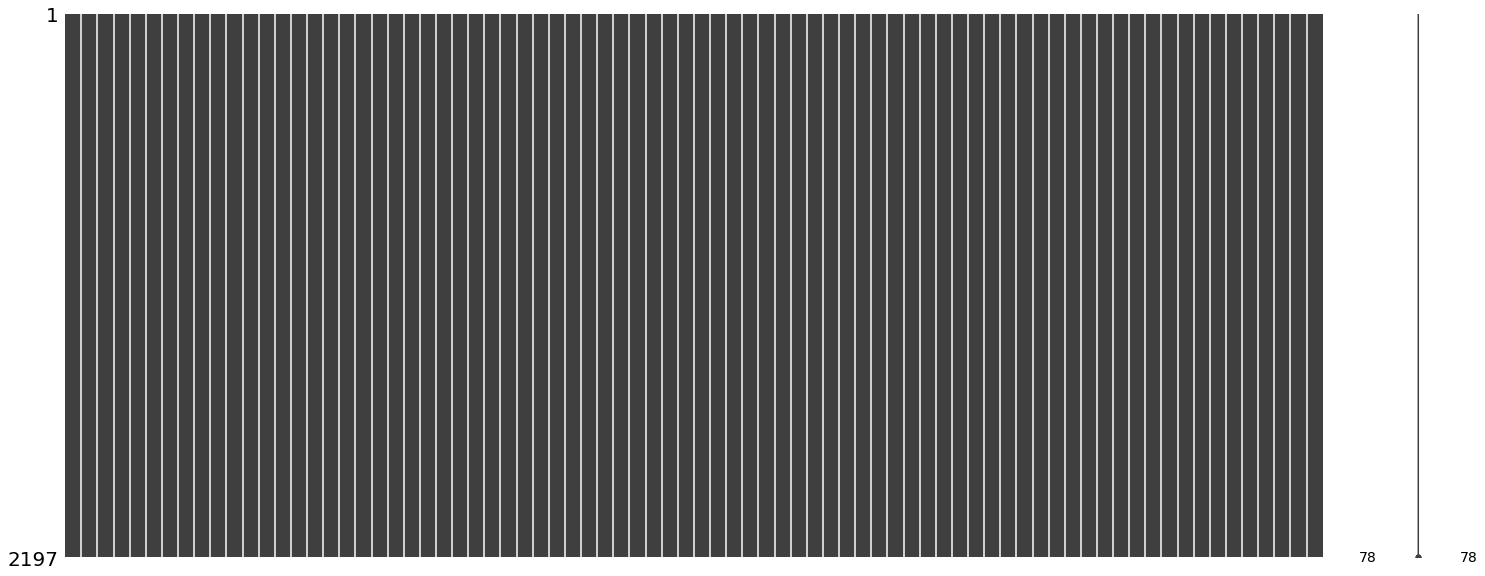

In [39]:
# Check for missing values
msno.matrix(df);

In [40]:
df.shape

(2197, 78)

## Export to save the dataset

In [41]:
if status == 'train':
    df.to_csv('../datasets/train_fill.csv', index=False)
else:
    df.to_csv('../datasets/test_fill.csv', index=False)

----